### 자전거도로 현황

#### 전처리 및 연도별 도로종류별 도로길이 총합 분석

In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
import folium
from folium import plugins

In [552]:
plt.rc('font', family='AppleGothic')

In [553]:
doro = pd.read_csv("/Users/chaewon/Desktop/서울빅캠/data/자전거도로 현황.csv")
doro = doro[1:]

In [554]:
doro.head()

,지역별(1),지역별(2),지역별(3),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,...,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9
1,지역별(1),지역별(2),지역별(3),소계,소계,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,...,소계,소계,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로
2,지역별(1),지역별(2),지역별(3),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),...,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km)
3,합계,소계,소계,562,916.0,95,138.8,322,611.6,48,...,1315,1316.0,225,179.8,814,871.7,102,73.9,174,190.6
4,합계,도로변,소계,504,639.0,78,87.9,281,385.5,48,...,1252,1035.1,213,149.6,763,621.0,102,73.9,174,190.6
5,합계,도로변,종로구,22,23.7,1,4.1,6,5.9,6,...,43,32.1,1,4.2,13,10.9,13,6.9,16,10.1


In [514]:
doro = doro.replace('-',0)
doro.head()

,지역별(1),지역별(2),지역별(3),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,...,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9
1,지역별(1),지역별(2),지역별(3),소계,소계,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,...,소계,소계,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로
2,지역별(1),지역별(2),지역별(3),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),...,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km)
3,합계,소계,소계,562,916.0,95,138.8,322,611.6,48,...,1315,1316.0,225,179.8,814,871.7,102,73.9,174,190.6
4,합계,도로변,소계,504,639.0,78,87.9,281,385.5,48,...,1252,1035.1,213,149.6,763,621.0,102,73.9,174,190.6
5,합계,도로변,종로구,22,23.7,1,4.1,6,5.9,6,...,43,32.1,1,4.2,13,10.9,13,6.9,16,10.1


In [515]:
doro = doro.iloc[:3,3:]
doro

,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,...,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9
1,소계,소계,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로,...,소계,소계,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로
2,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),...,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km)
3,562,916.0,95,138.8,322,611.6,48,55.0,97,110.6,...,1315,1316.0,225,179.8,814,871.7,102,73.9,174,190.6


In [516]:
doro18 = doro.iloc[:,2:10]

In [517]:
doro18

,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9
1,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로
2,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km)
3,95,138.8,322,611.6,48,55.0,97,110.6


In [518]:
km18 = dict(zip(doro18.iloc[0],doro18.iloc[2]))
km18


{'자전거 전용도로': '138.8',
 '자전거보행자 겸용도로': '611.6',
 '자전거 전용차로': '55.0',
 '자전거우선도로': '110.6'}

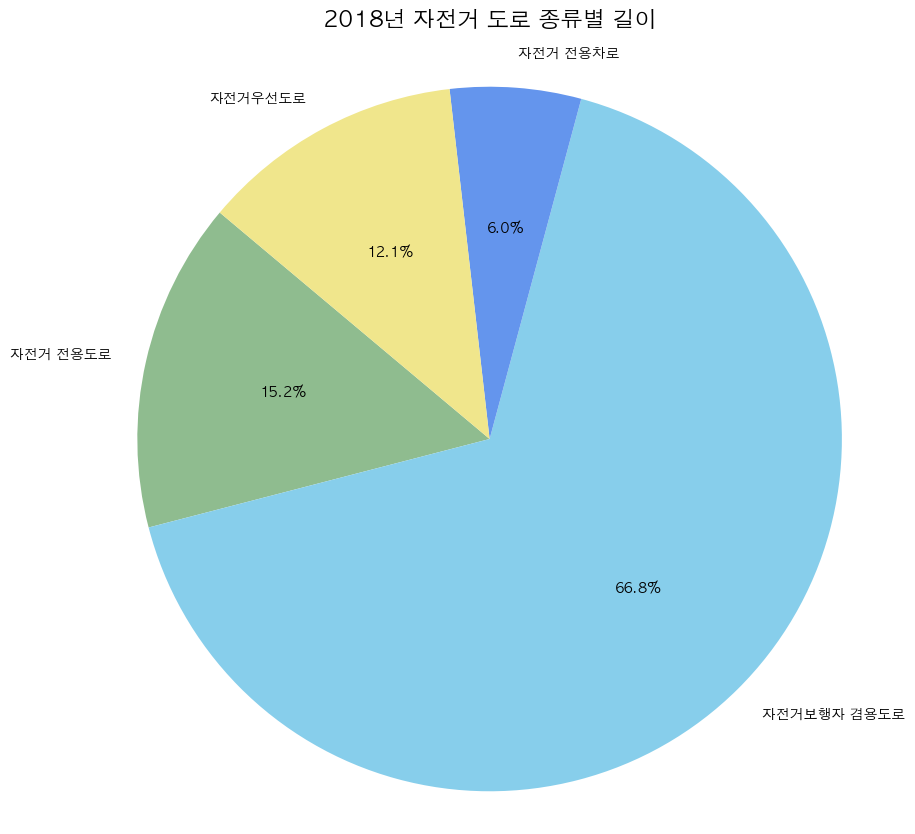

In [519]:
#2018년 자전거 도로 종류별 길이
labels = km18.keys()
colors = ['darkseagreen','skyblue', 'cornflowerblue', 'khaki']
values = [float(value) for value in km18.values()]
plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('2018년 자전거 도로 종류별 길이', fontsize=16, pad=20)
plt.axis('equal')  
plt.show()

In [520]:
doro19 = doro.iloc[:,12:20]
doro19

,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,2019.9
1,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로
2,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km)
3,100,148.7,340,622.0,53,58.9,97,111.0


In [521]:
km19 = dict(zip(doro19.iloc[0],doro19.iloc[2]))
km19

{'자전거 전용도로': '148.7',
 '자전거보행자 겸용도로': '622.0',
 '자전거 전용차로': '58.9',
 '자전거우선도로': '111.0'}

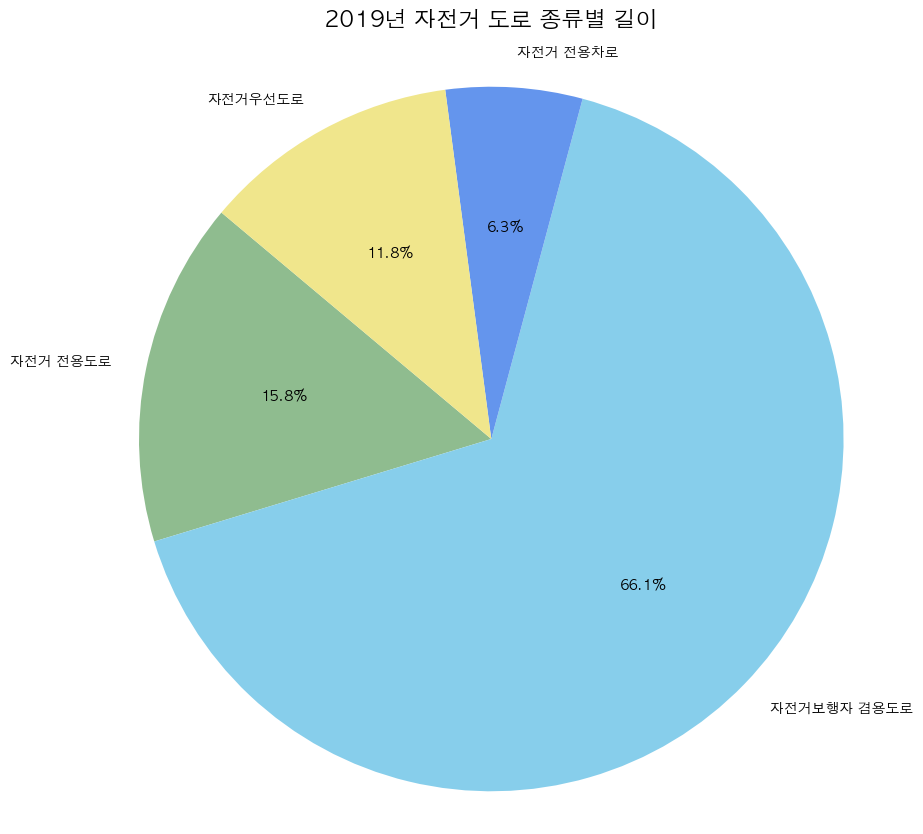

In [522]:
#2019년 자전거 도로 종류별 길이
labels = km19.keys()
colors = ['darkseagreen','skyblue', 'cornflowerblue', 'khaki']
values = [float(value) for value in km19.values()]
plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('2019년 자전거 도로 종류별 길이', fontsize=16, pad=20)
plt.axis('equal')  
plt.show()

In [523]:
doro20 = doro.iloc[:,22:30]
doro20

,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9
1,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로
2,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km)
3,199,182.7,687,810.4,95,74.3,170,191.5


In [524]:
km20 = dict(zip(doro20.iloc[0],doro20.iloc[2]))
km20

{'자전거 전용도로': '182.7',
 '자전거보행자 겸용도로': '810.4',
 '자전거 전용차로': '74.3',
 '자전거우선도로': '191.5'}

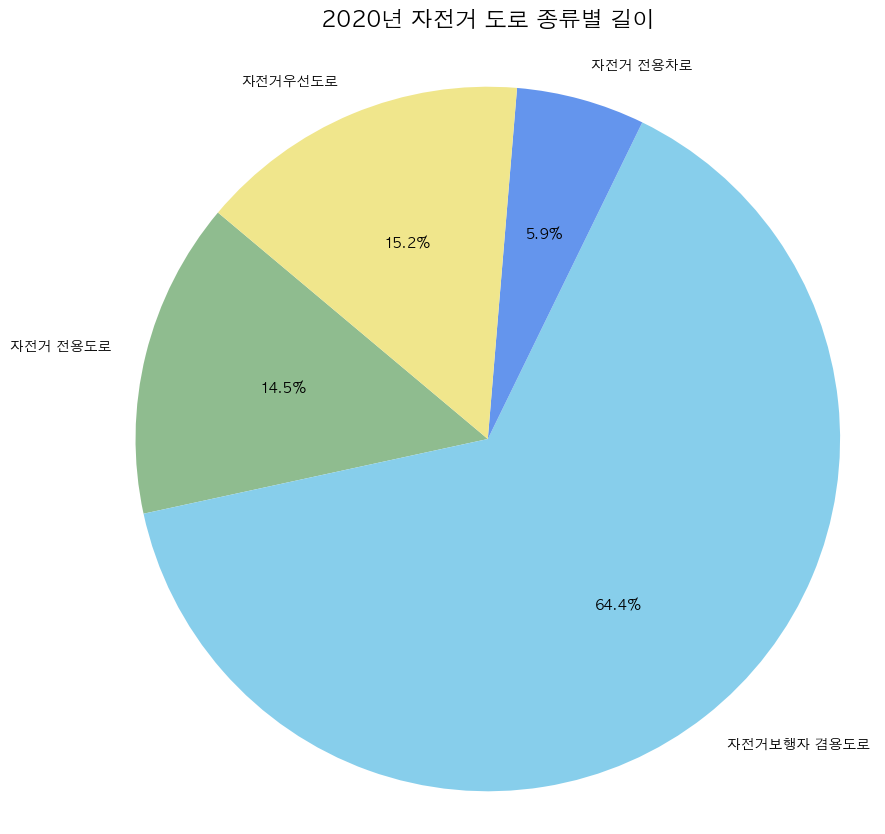

In [525]:
#2020년 자전거 도로 종류별 길이
labels = km20.keys()
colors = ['darkseagreen','skyblue', 'cornflowerblue', 'khaki']
values = [float(value) for value in km20.values()]
plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('2020년 자전거 도로 종류별 길이', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

In [526]:
doro21 = doro.iloc[:,32:40]
doro21

,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
1,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로
2,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km)
3,214,181.0,753,843.5,103,75.5,172,190.5


In [527]:
km21 = dict(zip(doro21.iloc[0],doro21.iloc[2]))
km21

{'자전거 전용도로': '181.0',
 '자전거보행자 겸용도로': '843.5',
 '자전거 전용차로': '75.5',
 '자전거우선도로': '190.5'}

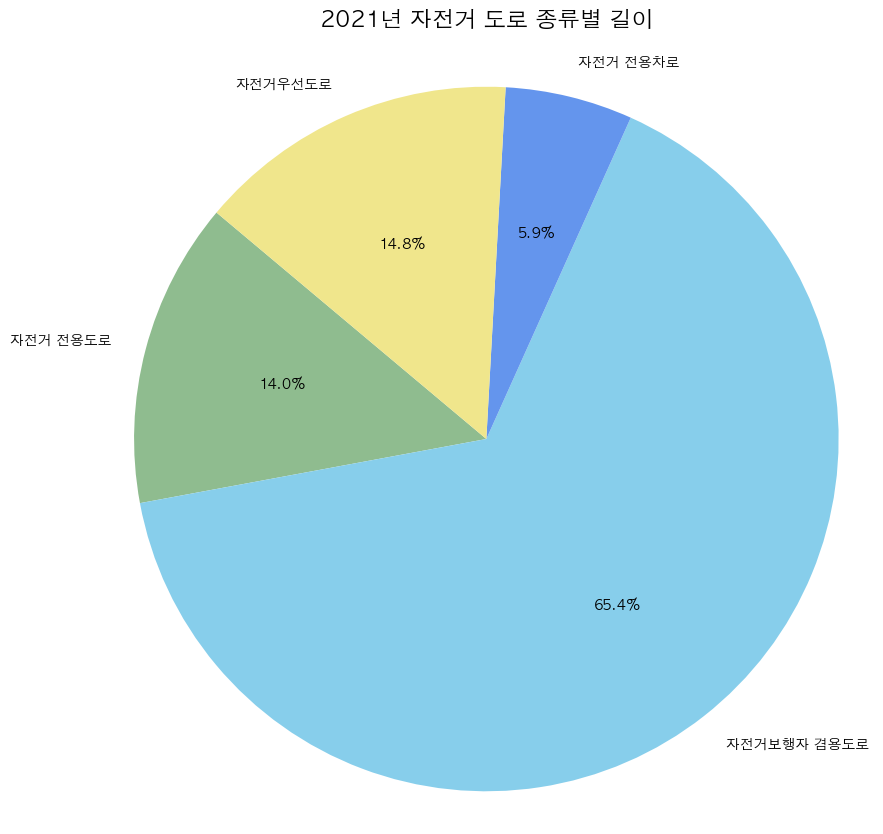

In [528]:
#2021년 자전거 도로 종류별 길이
labels = km21.keys()
colors = ['darkseagreen','skyblue', 'cornflowerblue', 'khaki']
values = [float(value) for value in km21.values()]
plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('2021년 자전거 도로 종류별 길이', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

In [529]:
doro22 = doro.iloc[:,42:50]
doro22

,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9
1,자전거 전용도로,자전거 전용도로,자전거보행자 겸용도로,자전거보행자 겸용도로,자전거 전용차로,자전거 전용차로,자전거우선도로,자전거우선도로
2,노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km),노선수 (개),길이 (km)
3,225,179.8,814,871.7,102,73.9,174,190.6


In [530]:
km22 = dict(zip(doro22.iloc[0],doro22.iloc[2]))
km22

{'자전거 전용도로': '179.8',
 '자전거보행자 겸용도로': '871.7',
 '자전거 전용차로': '73.9',
 '자전거우선도로': '190.6'}

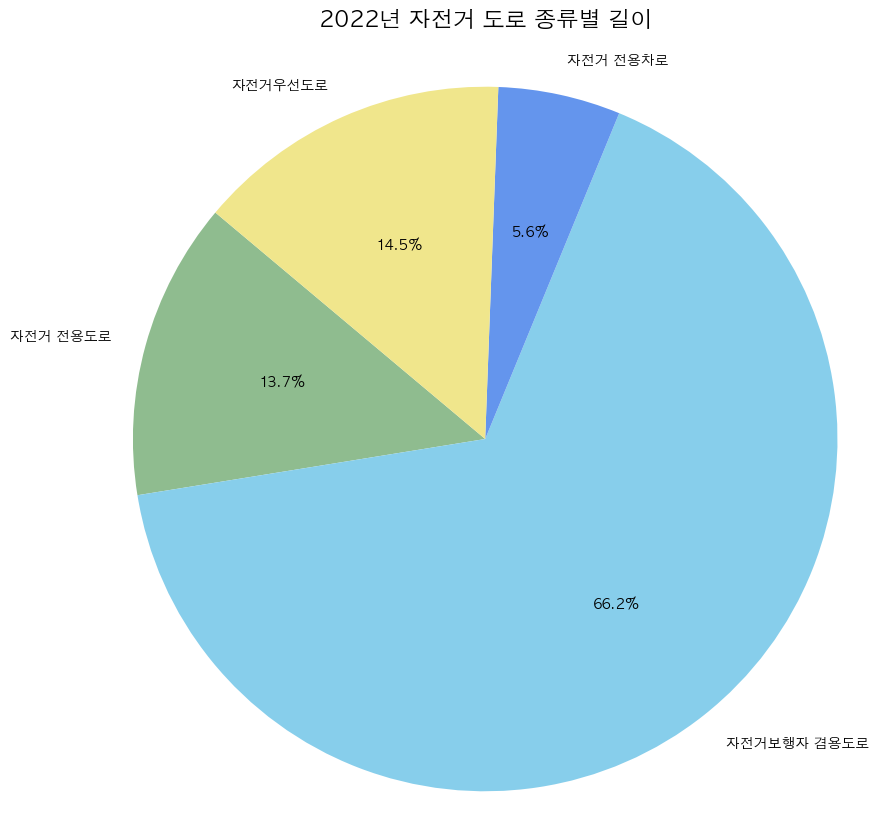

In [531]:
#2022년 자전거 도로 종류별 길이
labels = km22.keys()
colors = ['darkseagreen','skyblue', 'cornflowerblue', 'khaki']
values = [float(value) for value in km22.values()]
plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
plt.title('2022년 자전거 도로 종류별 길이', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

In [532]:
#자전거 전용도로
doro1 = doro.filter(like = '.3', axis=1)
doro1 = doro1.rename(columns={'2018.3':'2018', '2019.3':'2019','2020.3':'2020','2021.3':'2021','2022.3':'2022'})
doro1_dict = {}
for col in doro1.columns:
    doro1_dict[col] = doro1[col].iloc[2]

print(doro1_dict)

{'2018': '138.8', '2019': '148.7', '2020': '182.7', '2021': '181.0', '2022': '179.8'}


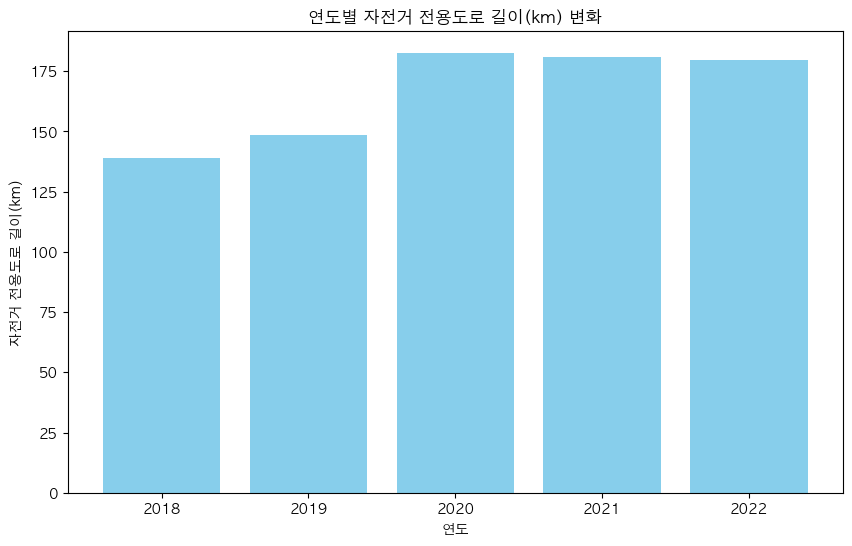

In [533]:
years = list(doro1_dict.keys())
lengths = [float(value) for value in doro1_dict.values()]

plt.figure(figsize=(10, 6))
plt.bar(years, lengths, color='skyblue')
plt.xlabel('연도')
plt.ylabel('자전거 전용도로 길이(km)')
plt.title('연도별 자전거 전용도로 길이(km) 변화')
plt.show()

In [534]:
#자전거보행자 겸용도로
doro2 = doro.filter(like = '.5', axis=1)
doro2 = doro2.rename(columns={'2018.5':'2018', '2019.5':'2019','2020.5':'2020','2021.5':'2021','2022.5':'2022'})
doro2_dict = {}
for col in doro2.columns:
    doro2_dict[col] = doro2[col].iloc[2]

print(doro2_dict)

{'2018': '611.6', '2019': '622.0', '2020': '810.4', '2021': '843.5', '2022': '871.7'}


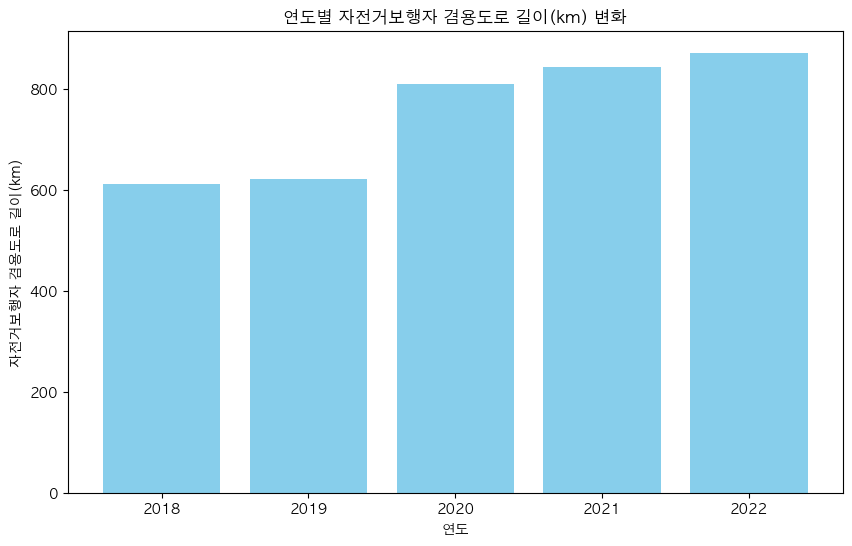

In [535]:
years = list(doro2_dict.keys())
lengths = [float(value) for value in doro2_dict.values()]

plt.figure(figsize=(10, 6))
plt.bar(years, lengths, color='skyblue')
plt.xlabel('연도')
plt.ylabel('자전거보행자 겸용도로 길이(km)')
plt.title('연도별 자전거보행자 겸용도로 길이(km) 변화')
plt.show()

In [536]:
#자전거 전용차로
doro3 = doro.filter(like = '.7', axis=1)
doro3 = doro3.rename(columns={'2018.7':'2018', '2019.7':'2019','2020.7':'2020','2021.7':'2021','2022.7':'2022'})
doro3_dict = {}
for col in doro3.columns:
    doro3_dict[col] = doro3[col].iloc[2]

print(doro3_dict)

{'2018': '55.0', '2019': '58.9', '2020': '74.3', '2021': '75.5', '2022': '73.9'}


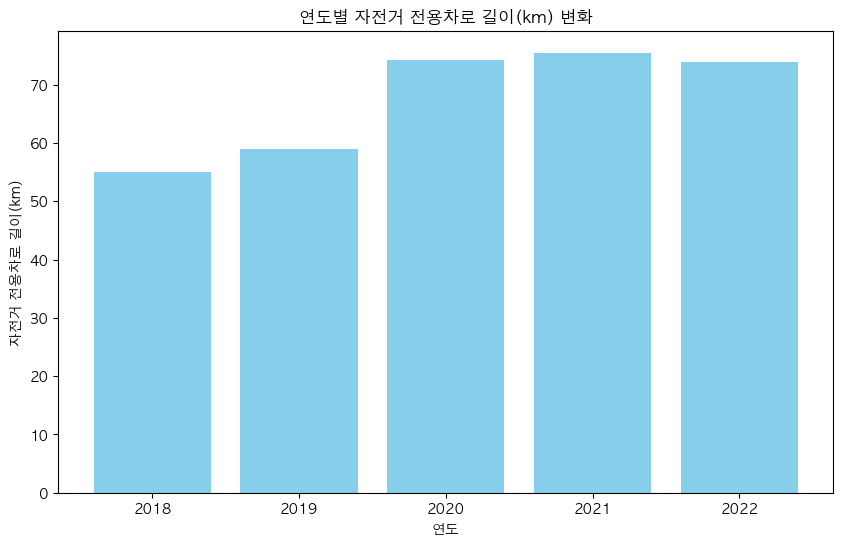

In [537]:
years = list(doro3_dict.keys())
lengths = [float(value) for value in doro3_dict.values()]

plt.figure(figsize=(10, 6))
plt.bar(years, lengths, color='skyblue')
plt.xlabel('연도')
plt.ylabel('자전거 전용차로 길이(km)')
plt.title('연도별 자전거 전용차로 길이(km) 변화')
plt.show()

In [538]:
#자전거 우선도로
doro4 = doro.filter(like = '.9', axis=1)
doro4 = doro4.rename(columns={'2018.9':'2018', '2019.9':'2019','2020.9':'2020','2021.9':'2021','2022.9':'2022'})
doro4_dict = {}
for col in doro4.columns:
    doro4_dict[col] = doro4[col].iloc[2]

print(doro4_dict)

{'2018': '110.6', '2019': '111.0', '2020': '191.5', '2021': '190.5', '2022': '190.6'}


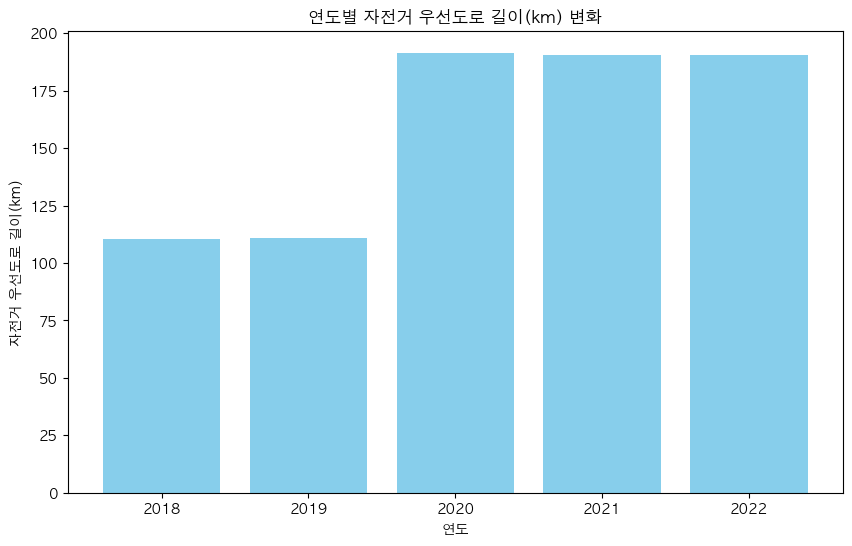

In [539]:
years = list(doro4_dict.keys())
lengths = [float(value) for value in doro4_dict.values()]

plt.figure(figsize=(10, 6))
plt.bar(years, lengths, color='skyblue')
plt.xlabel('연도')
plt.ylabel('자전거 우선도로 길이(km)')
plt.title('연도별 자전거 우선도로 길이(km) 변화')
plt.show()

### 지역별

In [559]:
region = doro.iloc[4:-3]
region = region.iloc[:,2:]

In [560]:
region

,지역별(3),2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9
5,종로구,22,23.7,1,4.1,6,5.9,6,5.8,9,...,43,32.1,1,4.2,13,10.9,13,6.9,16,10.1
6,중구,13,15.4,-,-,2,2.4,1,0.7,10,...,21,22.4,1,4.2,6,7.5,-,-,14,10.7
7,용산구,16,22.1,3,1.6,8,10.4,-,-,5,...,26,32.5,5,1.9,11,10.2,-,-,10,20.4
8,성동구,22,20.6,3,0.6,10,9.2,2,5.5,7,...,32,27.8,2,1.7,18,15.9,3,2.0,9,8.2
9,광진구,22,29.8,1,0.4,17,25.1,1,0.5,3,...,50,48.3,1,0.2,43,43.2,1,0.3,5,4.6
10,동대문구,22,24.3,4,2.5,11,7.4,-,-,7,...,33,37.7,5,2.8,12,7.5,-,-,16,27.4
11,중랑구,8,6.1,4,3.2,4,2.9,-,-,-,...,22,9.8,10,3.7,12,6.0,-,-,-,-
12,성북구,7,8.0,1,0.3,5,5.3,1,2.4,-,...,30,16.8,15,6.6,9,7.0,5,2.9,1,0.4
13,강북구,3,7.0,-,-,1,2.7,2,4.3,-,...,8,8.7,-,-,3,3.2,5,5.5,-,-
14,도봉구,4,12.3,1,0.7,3,11.6,-,-,-,...,8,12.9,2,1.4,6,11.5,-,-,-,-


In [578]:
#지역(구)별 노선수
region_nosun = region[['지역별(3)','2018','2019','2020','2021','2022']]
#지역(구)별 도로길이
region_len = region[['지역별(3)','2018.1','2019.1','2020.1','2021.1','2022.1']]

In [579]:
region_nosun = region_nosun.rename(columns = {'지역별(3)':'지역'})

In [583]:
region_nosun = region_nosun.set_index('지역')
region_nosun

,2018,2019,2020,2021,2022
지역,,,,,
종로구,22,24,38,42,43
중구,13,12,18,21,21
용산구,16,19,26,26,26
성동구,22,21,31,30,32
광진구,22,23,50,49,50
동대문구,22,21,30,33,33
중랑구,8,9,16,22,22
성북구,7,8,13,23,30
강북구,3,3,8,8,8


In [605]:
dict18 = region_nosun['2018'][:-1].to_dict()
dict18

{'종로구': '22',
 '중구': '13',
 '용산구': '16',
 '성동구': '22',
 '광진구': '22',
 '동대문구': '22',
 '중랑구': '8',
 '성북구': '7',
 '강북구': '3',
 '도봉구': '4',
 '노원구': '25',
 '은평구': '17',
 '서대문구': '28',
 '마포구': '33',
 '양천구': '28',
 '강서구': '34',
 '구로구': '15',
 '금천구': '7',
 '영등포구': '43',
 '동작구': '14',
 '관악구': '15',
 '서초구': '23',
 '강남구': '27',
 '송파구': '50',
 '강동구': '33'}

In [588]:
boundary = gp.read_file('/Users/chaewon/Downloads/LARD_ADM_SECT_SGG_ìì¸/LARD_ADM_SECT_SGG_11.shp', encoding = 'cp949')

boundary = boundary.rename(columns = {'SGG_NM':'지역'})

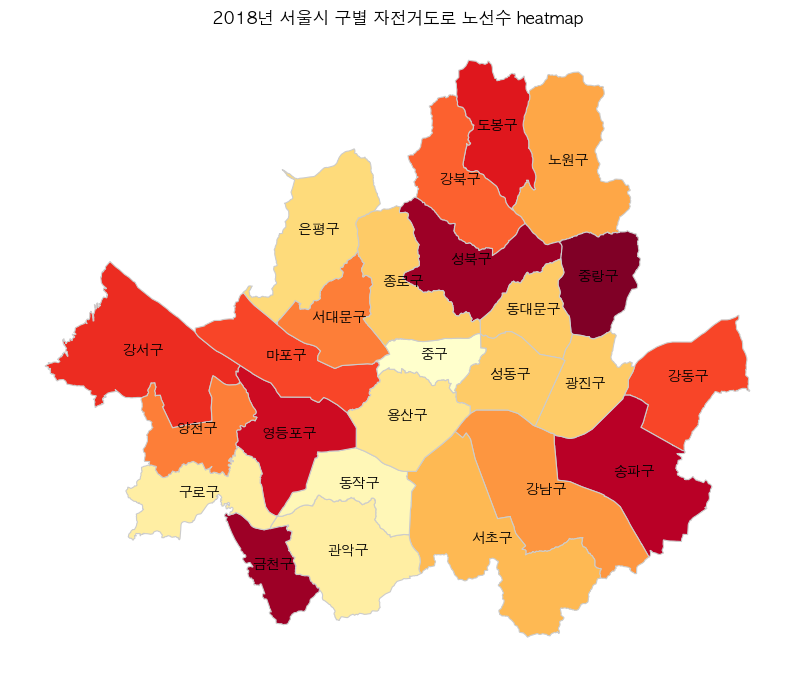

In [614]:
heatmap_df = boundary.copy()
heatmap_df['heatmap_value'] = heatmap_df['지역'].map(dict18)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
heatmap_df.plot(column='heatmap_value', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('2018년 서울시 구별 자전거도로 노선수 heatmap')
ax.set_axis_off()
for idx, row in heatmap_df.iterrows():
    plt.annotate(text=row['지역'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=10, ha='center', color='black')

plt.show()

In [581]:
region_len = region_len.rename(columns = {'지역별(3)':'지역', '2018.1':'2018','2019.1':'2019','2020.1':'2020','2021.1':'2021','2022.1':'2022'})

In [584]:
region_len = region_len.set_index('지역')
region_len

,2018,2019,2020,2021,2022
지역,,,,,
종로구,23.7,23.7,26.5,31.6,32.1
중구,15.4,15.4,15.3,22.4,22.4
용산구,22.1,22.7,33.0,33.0,32.5
성동구,20.6,19.9,27.2,27.2,27.8
광진구,29.8,29.8,46.8,47.7,48.3
동대문구,24.3,23.9,37.8,37.7,37.7
중랑구,6.1,6.6,10.0,9.8,9.8
성북구,8.0,7.7,9.8,14.5,16.8
강북구,7.0,7.0,8.7,8.7,8.7


In [617]:
dict18 = region_len['2018'][:-1].to_dict()
dict18

{'종로구': '23.7',
 '중구': '15.4',
 '용산구': '22.1',
 '성동구': '20.6',
 '광진구': '29.8',
 '동대문구': '24.3',
 '중랑구': '6.1',
 '성북구': '8.0',
 '강북구': '7.0',
 '도봉구': '12.3',
 '노원구': '28.3',
 '은평구': '26.9',
 '서대문구': '19.4',
 '마포구': '33.4',
 '양천구': '40.0',
 '강서구': '27.9',
 '구로구': '10.9',
 '금천구': '8.2',
 '영등포구': '36.6',
 '동작구': '13.4',
 '관악구': '19.5',
 '서초구': '23.5',
 '강남구': '52.6',
 '송파구': '91.7',
 '강동구': '40.8'}

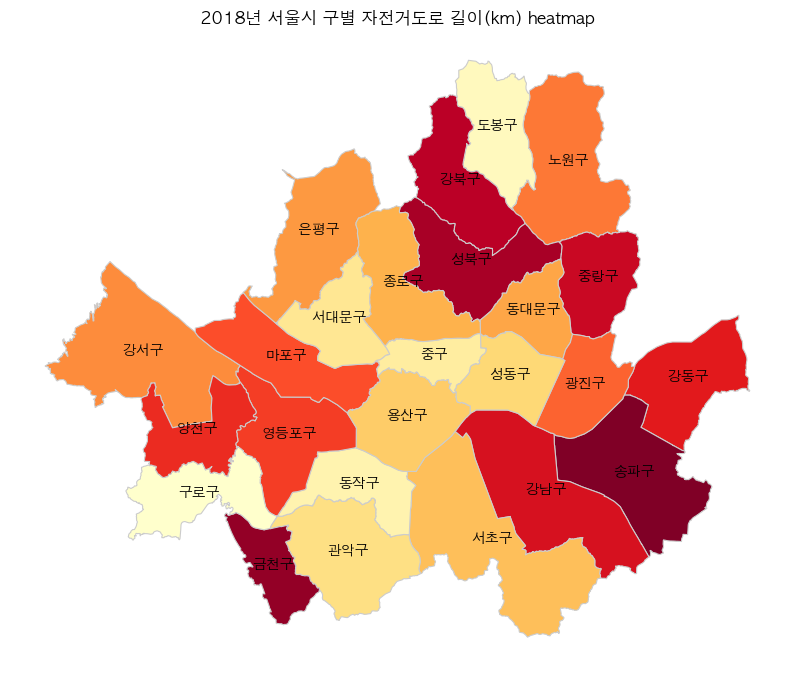

In [619]:
heatmap_df = boundary.copy()
heatmap_df['heatmap_value'] = heatmap_df['지역'].map(dict18)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
heatmap_df.plot(column='heatmap_value', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.title('2018년 서울시 구별 자전거도로 길이(km) heatmap')
ax.set_axis_off()
for idx, row in heatmap_df.iterrows():
    plt.annotate(text=row['지역'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=10, ha='center', color='black')

plt.show()